# **Uber pickups**

# Part I : EDA

## 1. Import useful Libraries

In [1]:
!pip  install plotly -q

In [2]:
import pandas as pd
import numpy as np
from math import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import  silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt 
! pip install plotly -q
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "iframe_connected"

import warnings
warnings.filterwarnings("ignore")

## 2. Import the dataset

In [3]:
dataset_original = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv")

In [4]:
dataset_original.to_csv('src/uber_apr14')

## 3. Basic exploration 

In [5]:
dataset_original.shape

(564516, 4)

In [6]:
dataset_original.describe(include='all')

,Date/Time,Lat,Lon,Base
count,564516,564516.000000,564516.000000,564516
unique,41999,NaN,NaN,5
top,4/7/2014 20:21:00,NaN,NaN,B02682
freq,97,NaN,NaN,227808
mean,NaN,40.740005,-73.976817,NaN
std,NaN,0.036083,0.050426,NaN
min,NaN,40.072900,-74.773300,NaN
25%,NaN,40.722500,-73.997700,NaN
50%,NaN,40.742500,-73.984800,NaN
75%,NaN,40.760700,-73.970000,NaN


In [7]:
dataset_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [8]:
type(dataset_original['Date/Time'][0])

str

In [9]:
dataset_original['Date/Time'][0]

'4/1/2014 0:11:00'

## 4. Cleaning the dataset

In [10]:
# Converting the the 'Date/Time' values into timestamp values
dataset_original['Date/Time']=pd.to_datetime(dataset_original['Date/Time'])

In [11]:
dataset_original.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [12]:
type(dataset_original['Date/Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
dataset = dataset_original

dataset['day_of_week']=dataset['Date/Time'].dt.dayofweek
dataset['hour']=dataset['Date/Time'].dt.hour
#dataset['interval']=dataset['hour'].apply(lambda x : '[{}h - {}h]'.format(2*floor(x/2),2*(floor(x/2)+1)))
#dataset['day_night']=dataset['hour'].apply(lambda x : 'night' if (x>20 and x<6) else 'day')

dataset = dataset.drop(['Date/Time'],axis=1)

In [14]:
dataset.head()

,Lat,Lon,Base,day_of_week,hour
0,40.7690,-73.9549,B02512,1,0
1,40.7267,-74.0345,B02512,1,0
2,40.7316,-73.9873,B02512,1,0
3,40.7588,-73.9776,B02512,1,0
4,40.7594,-73.9722,B02512,1,0


In [15]:
dataset.describe(include='all')

,Lat,Lon,Base,day_of_week,hour
count,564516.000000,564516.000000,564516,564516.00000,564516.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,B02682,NaN,NaN
freq,NaN,NaN,227808,NaN,NaN
mean,40.740005,-73.976817,NaN,2.86698,14.465043
std,0.036083,0.050426,NaN,1.82081,5.873925
min,40.072900,-74.773300,NaN,0.00000,0.000000
25%,40.722500,-73.997700,NaN,1.00000,10.000000
50%,40.742500,-73.984800,NaN,3.00000,16.000000
75%,40.760700,-73.970000,NaN,4.00000,19.000000


In [16]:
dataset.drop('Base',axis=1,inplace=True)

In [17]:
dataset = dataset.sample(10000, random_state=0)

In [18]:
#Check of missing values share
print(100*dataset.isna().sum()/dataset.shape[0])

Lat            0.0
Lon            0.0
day_of_week    0.0
hour           0.0
dtype: float64


## 5. Visualizations

In [19]:
# Distribution of variables

features = ["day_of_week", "hour"]
fig1 = make_subplots(rows = len(features), cols = 1, subplot_titles = features)
for i in range(len(features)):
    fig1.add_trace(
        go.Histogram(
            x = dataset[features[i]], nbinsx = 50),
        row = i + 1,
        col = 1)
fig1.update_layout(
        title = go.layout.Title(text = "Distribution of variables", x = 0.5), showlegend = False, 
            autosize=True, height=1000)
fig1.show()

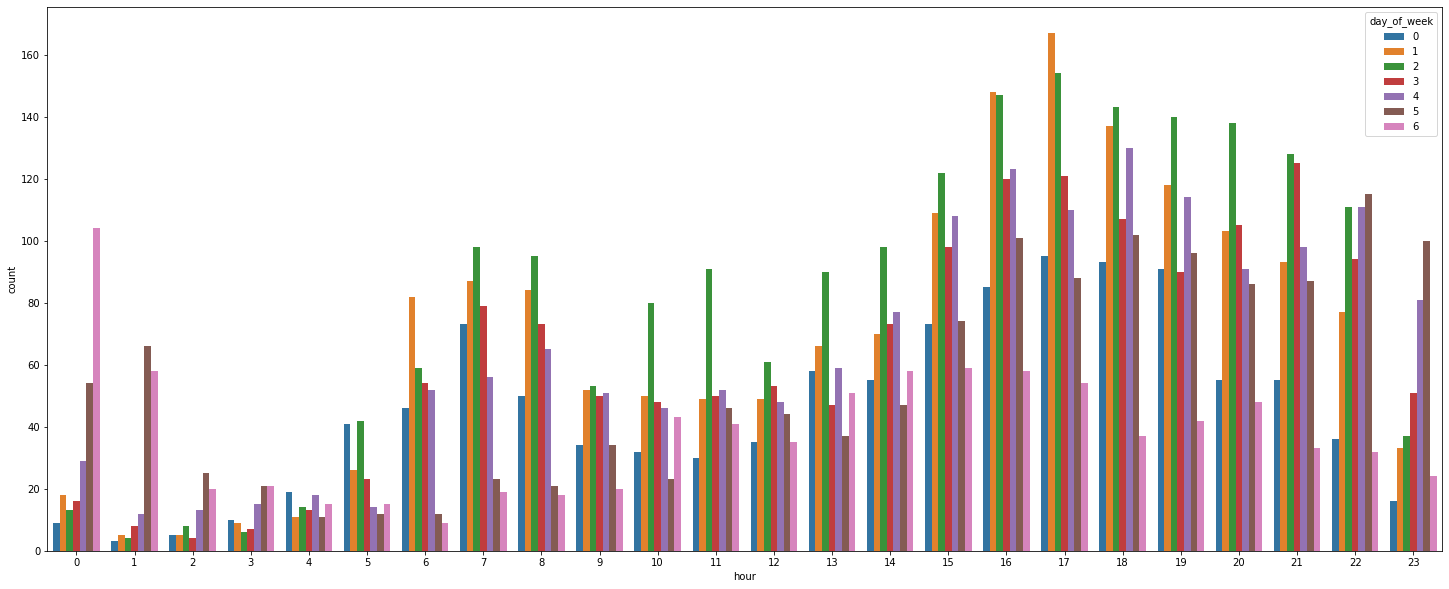

In [20]:
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.countplot(x=dataset['hour'], hue=dataset['day_of_week'])

In [21]:
# Scatter mapbox of all the data according to the day of week
fig1 = px.scatter_mapbox(dataset, lat="Lat", lon="Lon", color='day_of_week', mapbox_style="carto-positron")
fig1.show('iframe')

In [22]:
# Scatter mapbox of all data according to the hour
fig1 = px.scatter_mapbox(dataset, lat="Lat", lon="Lon", color='hour', mapbox_style="carto-positron")
fig1.show('iframe')

## Part II : Clustering on a sample of data (Tuesday at 17h)

In [23]:
# Define a function that slices the dataset according to the day_of_week and/or the hour
def data_slice(df,day_of_week,hour):
    if day_of_week == None:
        res = df[df['hour']== hour]
    else:
        if  hour == None:
            res = df[df['day_of_week']== day_of_week]
        else:
            res = df[(df['day_of_week']== day_of_week) & (df['hour']== hour)]
    return(res)

In [24]:
# data for Tuesday at 17h
df = data_slice(dataset,1,17)

In [25]:
# Standard scaling
sc = StandardScaler()
X = sc.fit_transform(df)

In [26]:
# Use the Elbow method to find the optimal number of clusters

wcss =  []
k = []
for i in range (2,15): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=2 --> 215.14991255076225
WCSS for K=3 --> 141.63145558650712
WCSS for K=4 --> 95.75107010454408
WCSS for K=5 --> 73.44306504576656
WCSS for K=6 --> 55.60766664255733
WCSS for K=7 --> 42.016802642088
WCSS for K=8 --> 34.12997792035292
WCSS for K=9 --> 28.947890262723657
WCSS for K=10 --> 24.49878114453335
WCSS for K=11 --> 20.996539202343627
WCSS for K=12 --> 17.753886595637173
WCSS for K=13 --> 15.22805561539413
WCSS for K=14 --> 12.6959428528983


In [27]:
# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

fig.show()

In [28]:
# Use the silhouette method to see if we can refine our hypothesis for k clusters

# Computer mean silhouette score
sil = []
k = []

#We need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,15): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.49122101409178187
Silhouette score for K=3 is 0.5185605860143208
Silhouette score for K=4 is 0.5254059615997388
Silhouette score for K=5 is 0.4944583248786073
Silhouette score for K=6 is 0.40627367387417074
Silhouette score for K=7 is 0.4560184590002739
Silhouette score for K=8 is 0.44230947899958123
Silhouette score for K=9 is 0.40152617807193475
Silhouette score for K=10 is 0.4099047500767273
Silhouette score for K=11 is 0.4146039456671299
Silhouette score for K=12 is 0.41189584526399603
Silhouette score for K=13 is 0.4171931042695644
Silhouette score for K=14 is 0.42275346179772094


In [29]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="Clusters",
    title="Silhouette Score per cluster"
)

fig.show()

### Clustering with KMeans and DBscan

In [30]:
# Define a fuction that makes KMeans clustering and plots the clusters
def clustering_kmeans_viz(data, n_clusters):
    sc = StandardScaler()
    X = sc.fit_transform(data)
    kmeans = KMeans(n_clusters= n_clusters)
    kmeans.fit(X)
    data["cluster_kmeans"] = kmeans.labels_
    data["cluster_kmeans"] = data["cluster_kmeans"].astype(str)
    fig = px.scatter_mapbox(data,
                        lat="Lat",
                        lon="Lon",
                        color="cluster_kmeans",
                        mapbox_style="carto-positron",
                        zoom=10)
    fig.show()

In [31]:
# Define a fuction that makes DBscan clustering and plots the clusters
def clustering_dbscan_viz(data, eps, min_samples, metric):
    sc = StandardScaler()
    X = sc.fit_transform(data)
    db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    db.fit(X)
    data["cluster_dbscan"] = db.labels_
    data = data[data['cluster_dbscan'] >= 0]
    data["cluster_dbscan"] = data["cluster_dbscan"].astype(str)
    fig = px.scatter_mapbox(data,
                        lat="Lat",
                        lon="Lon",
                        color="cluster_dbscan",
                        mapbox_style="carto-positron",
                        zoom=10)
    fig.show()

In [32]:
data = data_slice(dataset,1,17)

In [33]:
clustering_kmeans_viz(data, 3)

In [34]:
clustering_dbscan_viz(data, 0.2, 10, 'manhattan')

## Part III : Clustering generalized to Tuesday any time

In [35]:
data = data_slice(dataset,1,None)

In [36]:
clustering_dbscan_viz(data, 0.2, 10, 'manhattan')

In [37]:
clustering_kmeans_viz(data, 10)

## Part IV : Clustering generalized to the whole dataset

In [38]:
# Define a function that makes the clustering and returns the dataset with the clusters, the number of clusterns and the number of outliers
def clustering_dbscan(data, eps, min_samples, metric):
    sc = StandardScaler()
    X = sc.fit_transform(data)
    db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    db.fit(X)
    data["cluster_dbscan"] = db.labels_
    data["cluster_dbscan"] = data["cluster_dbscan"].astype(str)
    nb_clusters = np.unique(db.labels_).shape[0]
    nb_outliers = -sum([0 if i!=-1 else i for i in db.labels_])
    return(data,nb_clusters, nb_outliers)

In [39]:
# DBscan for all days with esp=0.2 and min_samples=10
clus = []
clus_df = []
for i in range(7):
    data = data_slice(dataset,i,None)
    res = clustering_dbscan(data,0.2,10,"manhattan")
    clus.append((i,data.shape[0],res[1],res[2],round(res[2]/data.shape[0]*100,1)))
    clus_df = res[0]
pd.DataFrame(clus, columns=['day', 'Nb_rows', 'nb_clusters','nb_outliers','percentage_outliers'])

,day,Nb_rows,nb_clusters,nb_outliers,percentage_outliers
0,0,1099,7,823,74.9
1,1,1648,10,1190,72.2
2,2,1932,15,1291,66.8
3,3,1509,5,1040,68.9
4,4,1573,13,1203,76.5
5,5,1325,10,1028,77.6
6,6,914,3,785,85.9


In [40]:
# DBscan for all days with esp=0.25 and min_samples=
clus = []
clus_df = []
for i in range(7):
    data = data_slice(dataset,i,None)
    res = clustering_dbscan(data,0.25,15,"manhattan")
    clus.append((i,data.shape[0],res[1],res[2],round(res[2]/data.shape[0]*100,1)))
    clus_df = res[0]
pd.DataFrame(clus, columns=['day', 'Nb_rows', 'nb_clusters','nb_outliers','percentage_outliers'])

,day,Nb_rows,nb_clusters,nb_outliers,percentage_outliers
0,0,1099,3,774,70.4
1,1,1648,5,1136,68.9
2,2,1932,6,1212,62.7
3,3,1509,3,967,64.1
4,4,1573,7,1100,69.9
5,5,1325,8,1002,75.6
6,6,914,3,776,84.9


In [41]:
# DBscan for all days with esp=0.4 and min_samples=8
clus = []
clus_df = []
for i in range(7):
    data = data_slice(dataset,i,None)
    res = clustering_dbscan(data,0.4,8,"manhattan")
    clus.append((i,data.shape[0],res[1],res[2],round(res[2]/data.shape[0]*100,1)))
    clus_df = res[0]
pd.DataFrame(clus, columns=['day', 'Nb_rows', 'nb_clusters','nb_outliers','percentage_outliers'])

,day,Nb_rows,nb_clusters,nb_outliers,percentage_outliers
0,0,1099,6,256,23.3
1,1,1648,6,324,19.7
2,2,1932,6,333,17.2
3,3,1509,4,292,19.4
4,4,1573,6,337,21.4
5,5,1325,5,350,26.4
6,6,914,9,254,27.8


In [42]:
dict_days= {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

### Clustering day per day

In [43]:
for i in range(7):
    data = data_slice(dataset,i,None)
    print('Clusters for {}'. format(dict_days[i]))
    clustering_dbscan_viz(data, 0.2, 10, 'manhattan')

Clusters for Monday


Clusters for Tuesday


Clusters for Wednesday


Clusters for Thursday


Clusters for Friday


Clusters for Saturday


Clusters for Sunday


### Clustering on the whole dataset then separate day per day

In [44]:
# DBscan on the whole dataset
res = clustering_dbscan(dataset,0.2,10,"manhattan")
data = res[0]
data = data[data['cluster_dbscan'] != '-1']
data['day_name']= data['day_of_week'].map(dict_days)

In [45]:
#Map of the clusters for each day of the week
fig = px.scatter_mapbox(data,
                        lat="Lat",
                        lon="Lon",
                        animation_frame = 'day_name',
                        animation_group = 'day_name', 
                        category_orders={"day_name": ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']},
                        color="cluster_dbscan",
                        mapbox_style="carto-positron", 
                        zoom=10)
fig.show()

### Clusters per hour for a specific day

In [46]:
# Extract data for wednesday
dataset_wednesday = data_slice(dataset,2,None)

# DBscan on a specific day data (here wednesday)
res = clustering_dbscan(dataset,0.2,10,"manhattan")
data = res[0]
data = data[data['cluster_dbscan'] != '-1']
data['day_name']= data['day_of_week'].map(dict_days)

In [47]:
#Map of the clusters for each day of the week
fig = px.scatter_mapbox(data,
                        lat="Lat",
                        lon="Lon",
                        animation_frame = 'hour',
                        animation_group = 'hour', 
                        category_orders={"hour": list(range(24))},
                        color="cluster_dbscan",
                        mapbox_style="carto-positron", 
                        zoom=10)
fig.show()